In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!nvidia-smi

Fri May  7 19:05:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Будем использовать фраемворк MMDETECTION

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.8.1+cu111 torchvision==0.9.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.8.1/index.html
# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .


#!pip install Pillow==7.1.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1MB 1.3MB/s eta 0:14:58tcmalloc: large alloc 1147494400 bytes == 0x5610daa0e000 @  0x7f81e2dea615 0x5610a1dffcdc 0x5610a1edf52a 0x5610a1e02afd 0x5610a1ef3fed 0x5610a1e76988 0x5610a1e714ae 0x5610a1e043ea 0x5610a1e767f0 0x5610a1e714ae 0x5610a1e043ea 0x5610a1e7332a 0x5610a1ef4e36 0x5610a1e72853 0x5610a1ef4e36 0x5610a1e72853 0x5610a1ef4e36 0x5610a1e72853 0x5610a1ef4e36 0x5610a1f773e1 0x5610a1ed76a9 0x5610a1e42cc4 0x5610a1e03559 0x5610a1e774f8 0x5610a1e0430a 0x5610a1e723b5 0x5610a1e717ad 0x5610a1e043ea 0x5610a1e723b5 0x5610a1e0430a 0x5610a1e723b5
     |█████████████████               | 1055.7MB 1.3MB/s eta 0:12:10tcmalloc: large alloc 1434370048 bytes == 0x56111f064000 @  0x7f81e2dea615 0x5610a1dffcdc 0x5610a1edf52a 0x5610a1e02afd 0x5610a1ef3fed 0x5610a1e76988 0x5610a1e714ae 0x5610a1e043ea 0x5610a1e767f0 0x5610a1e714ae 0x5610a1e043ea 0x5610a1e7332a 0x5610a1ef4e36 0x5610a1e72853 0

Подключим гуглдиск и скачаем датасет

In [ ]:
#4/1AY0e-g7cFpymcrFyl7HWRZVskAL3qIb5DX1MSUSAoqfqeDM78rTryDG_5E0
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!tar -xvf /content/gdrive/MyDrive/cats_dogs_dataset.tar

Streaming output truncated to the last 5000 lines.
cats_dogs_dataset/train/american_pit_bull_terrier_183.jpg
cats_dogs_dataset/train/great_pyrenees_113.jpg
cats_dogs_dataset/train/scottish_terrier_162.jpg
cats_dogs_dataset/train/pug_147.txt
cats_dogs_dataset/train/Sphynx_130.jpg
cats_dogs_dataset/train/great_pyrenees_101.jpg
cats_dogs_dataset/train/chihuahua_102.jpg
cats_dogs_dataset/train/Maine_Coon_195.txt
cats_dogs_dataset/train/Birman_103.txt
cats_dogs_dataset/train/Persian_184.txt
cats_dogs_dataset/train/boxer_162.jpg
cats_dogs_dataset/train/yorkshire_terrier_148.txt
cats_dogs_dataset/train/pug_13.jpg
cats_dogs_dataset/train/Birman_154.jpg
cats_dogs_dataset/train/samoyed_177.jpg
cats_dogs_dataset/train/leonberger_144.jpg
cats_dogs_dataset/train/american_pit_bull_terrier_115.jpg
cats_dogs_dataset/train/german_shorthaired_156.jpg
cats_dogs_dataset/train/Birman_109.txt
cats_dogs_dataset/train/american_bulldog_16.txt
cats_dogs_dataset/train/yorkshire_terrier_123.txt
cats_dogs_dataset/

Будем файн тюнить готовую модель. Для основы возьмем SSD как простой пример. Продолжим его обучать на наших данных.

Загрузим чекпоинт для этого

In [ ]:
!mkdir checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20200307-a92d2092.pth \
      -O checkpoints/ssd300_coco_20200307-a92d2092.pth

--2021-05-07 19:26:53--  http://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20200307-a92d2092.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137237287 (131M) [application/octet-stream]
Saving to: ‘checkpoints/ssd300_coco_20200307-a92d2092.pth’

checkpoints/ssd300_ 100%[===================>] 130.88M  12.0MB/s    in 11s     

2021-05-07 19:27:05 (12.0 MB/s) - ‘checkpoints/ssd300_coco_20200307-a92d2092.pth’ saved [137237287/137237287]



Посмотрим на стандартную работу данной модели

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

In [ ]:
img = 'demo/demo.jpg'

Use load_from_local loader


/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


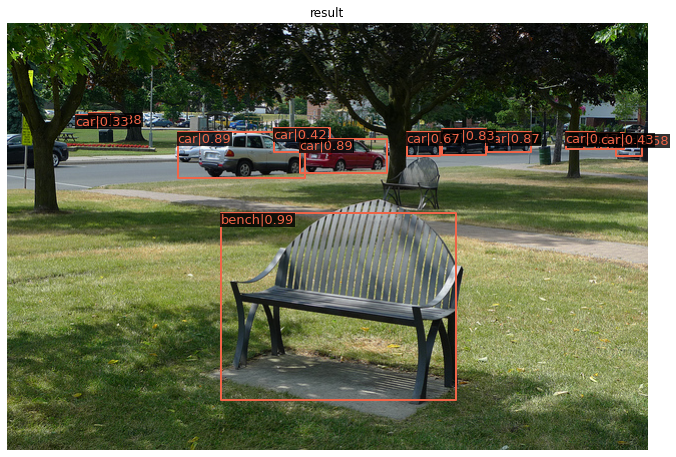

In [ ]:
config = 'configs/ssd/ssd300_coco.py'
checkpoint = 'checkpoints/ssd300_coco_20200307-a92d2092.pth'
model = init_detector(config, checkpoint, device='cuda:0')
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.3)

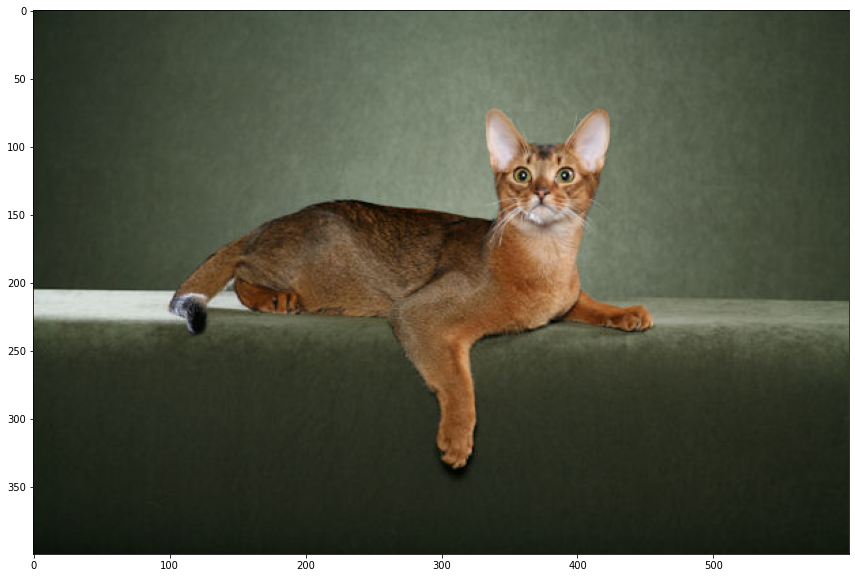

In [ ]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('cats_dogs_dataset/train/Abyssinian_1.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

Нужно входные данные по боксам и классам представить в следующем формате:

```python
[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4),
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

Для этого создадим свой собственный загрузчик датасета

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset


@DATASETS.register_module()
class CatsDogsDataset(CustomDataset):

    CLASSES = ('Cat', 'Dog')
    def load_annotations(self, ann_file):
        # load image list from file
        if self.ann_file == 'test':
          self.ann_file = 'valid'
    
        data_infos = []
        # convert annotations to middle format
        with os.scandir(f'{self.img_prefix}') as it:
          for entry in it:
            if entry.name.endswith('.jpg') and entry.is_file():
              image_id = entry.name[0:-4]
              filename = f'{self.img_prefix}/{image_id}.jpg'
              image = mmcv.imread(filename)
              height, width = image.shape[:2]
   
              data_info = dict(filename=f'{image_id}.jpg', width=width, height=height)
   
              # load annotations
              lines = mmcv.list_from_file(osp.join(self.img_prefix, f'{image_id}.txt'))
    
              content = [line.strip().split(' ') for line in lines]
              bbox_names = [x[0] for x in content]
              bboxes = [[float(info) for info in x[1:5]] for x in content]
    
              gt_bboxes = []
              gt_labels = []
              gt_bboxes_ignore = []
              gt_labels_ignore = []
    
              # filter 'DontCare'
              for bbox_name, bbox in zip(bbox_names, bboxes):
                gt_labels.append(str(int(bbox_name) - 1))
                gt_bboxes.append(bbox)
              data_anno = dict(
                  bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                  labels=np.array(gt_labels, dtype=np.long),
                  bboxes_ignore=np.array(gt_bboxes_ignore,
                                         dtype=np.float32).reshape(-1, 4),
                  labels_ignore=np.array(gt_labels_ignore, dtype=np.long))
              data_info.update(ann=data_anno)
              data_infos.append(data_info)
              

        return data_infos

In [ ]:
Загрузим изначальный конфиг, на котором обучалась модель и потом его изменим для наших данных

In [ ]:
from mmcv import Config

model_type = "ssd"

cfg = Config.fromfile('./configs/ssd/ssd300_coco.py')

In [ ]:
print(f'Config:\n{cfg.pretty_text}')

Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    pretrained='open-mmlab://vgg16_caffe',
    backbone=dict(
        type='SSDVGG',
        input_size=300,
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        l2_norm_scale=20),
    neck=None,
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=80,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[0.1, 0.1, 0.2, 0.2])),
    train_cfg=dict(
        assigner=dict(
            type='MaxIoUAssigner',

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'CatsDogsDataset'
cfg.data_root = 'cats_dogs_dataset/'

cfg.data.test.type = 'CatsDogsDataset'
cfg.data.test.data_root = 'cats_dogs_dataset/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'train/'

cfg.data.train.dataset.type = 'CatsDogsDataset'
cfg.data.train.dataset.data_root = 'cats_dogs_dataset/'
cfg.data.train.dataset.ann_file = 'train.txt'
cfg.data.train.dataset.img_prefix = 'train/'

cfg.data.val.type = 'CatsDogsDataset'
cfg.data.val.data_root = 'cats_dogs_dataset/'
cfg.data.val.ann_file = 'train.txt'
cfg.data.val.img_prefix = 'valid/'

cfg.model.bbox_head.num_classes = 2
cfg.load_from = 'checkpoints/ssd300_coco_20200307-a92d2092.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'


cfg.optimizer.lr = 0.02 / 8.

cfg.lr_config.warmup_ratio = 1.0 / 1e10
cfg.log_config.interval = 100
cfg.runner.max_epochs = 3

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 1

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    pretrained='open-mmlab://vgg16_caffe',
    backbone=dict(
        type='SSDVGG',
        input_size=300,
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        l2_norm_scale=20),
    neck=None,
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=2,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[0.1, 0.1, 0.2, 0.2])),
    train_cfg=dict(
        assigner=dict(
            type='MaxIoUAssigner',


Обучим нашу сеть

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = ('CAT', 'DOG')

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/content/mmdetection/mmdet/datasets/custom.py:156: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')
/content/mmdetection/mmdet/models/backbones/ssd_vgg.py:84: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2021-05-07 19:27:47,185 - mmdet - INFO - load checkpoint from checkpoints/ssd300_coco_20200307-a92d2092.pth
2021-05-07 19:27:47,187 - mmdet - 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 400/400, 33.9 task/s, elapsed: 12s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-05-07 19:41:04,124 - mmdet - INFO - 
+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| Cat   | 126 | 984  | 1.000  | 0.989 |
| Dog   | 274 | 3709 | 0.996  | 0.985 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.987 |
+-------+-----+------+--------+-------+
2021-05-07 19:41:04,251 - mmdet - INFO - Epoch(val) [1][1866]	AP50: 0.9870, mAP: 0.9873
2021-05-07 19:41:49,143 - mmdet - INFO - Epoch [2][100/1866]	lr: 2.500e-03, eta: 0:24:39, time: 0.447, data_time: 0.038, memory: 1609, loss_cls: 1.5695, loss_bbox: 0.5947, loss: 2.1641
2021-05-07 19:42:31,075 - mmdet - INFO - Epoch [2][200/1866]	lr: 2.500e-03, eta: 0:24:01, time: 0.419, data_time: 0.013, memory: 1609, loss_cls: 1.4879, loss_bbox: 0.5536, loss: 2.0415
2021-05-07 19:43:12,957 - mmdet - INFO - Epoch [2][300/1866]	lr: 2.500e-03, eta: 0:23:21, time: 0.419, data_time: 0.013, memory: 1609, loss_cls: 1.4563, loss_bbox: 0.5321, loss: 1.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 400/400, 33.7 task/s, elapsed: 12s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-05-07 19:54:22,351 - mmdet - INFO - 
+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| Cat   | 126 | 400  | 0.992  | 0.984 |
| Dog   | 274 | 1670 | 0.993  | 0.976 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.980 |
+-------+-----+------+--------+-------+
2021-05-07 19:54:22,356 - mmdet - INFO - Epoch(val) [2][1866]	AP50: 0.9800, mAP: 0.9802
2021-05-07 19:55:07,031 - mmdet - INFO - Epoch [3][100/1866]	lr: 2.500e-03, eta: 0:11:58, time: 0.445, data_time: 0.037, memory: 1609, loss_cls: 1.3727, loss_bbox: 0.4862, loss: 1.8590
2021-05-07 19:55:48,912 - mmdet - INFO - Epoch [3][200/1866]	lr: 2.500e-03, eta: 0:11:18, time: 0.419, data_time: 0.013, memory: 1609, loss_cls: 1.3884, loss_bbox: 0.4711, loss: 1.8596
2021-05-07 19:56:30,737 - mmdet - INFO - Epoch [3][300/1866]	lr: 2.500e-03, eta: 0:10:37, time: 0.418, data_time: 0.013, memory: 1609, loss_cls: 1.3256, loss_bbox: 0.4547, loss: 1.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 400/400, 34.0 task/s, elapsed: 12s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-05-07 20:07:39,422 - mmdet - INFO - 
+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| Cat   | 126 | 885  | 1.000  | 0.991 |
| Dog   | 274 | 2316 | 0.996  | 0.988 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.989 |
+-------+-----+------+--------+-------+
2021-05-07 20:07:39,426 - mmdet - INFO - Epoch(val) [3][1866]	AP50: 0.9890, mAP: 0.9891


In [ ]:
Проверим на валидационных картинках

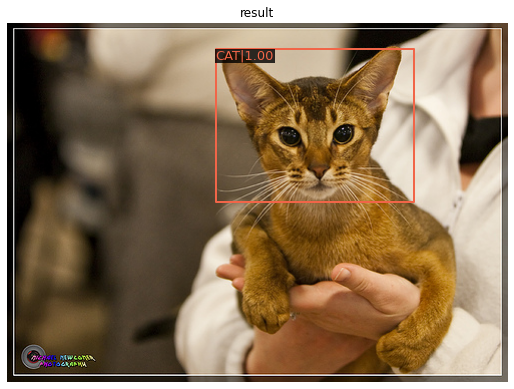

In [ ]:
img = mmcv.imread('cats_dogs_dataset/valid/Abyssinian_125.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


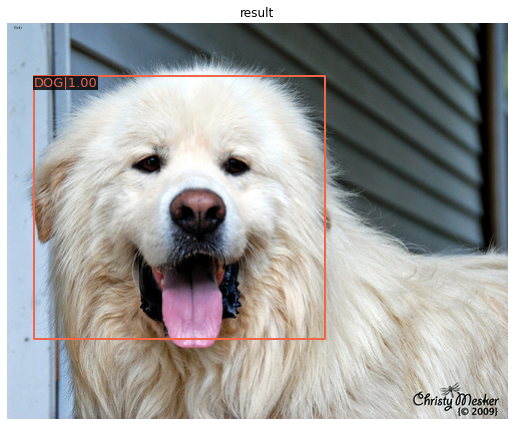

In [ ]:
img = mmcv.imread('cats_dogs_dataset/valid/great_pyrenees_104.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)